In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
#Configurations
file_path = r'C:\Users\Admin\Travel_Insurane_Claim_Status.xlsx'

A third-party travel insurance servicing company that is based in Singapore wants to know for any insurance policy, whether some features lead to the policy claimed.The goal of this project is to predict whether insurance policies are claimed based on some of the features.

In [5]:
#Reading the input
df = pd.read_excel(file_path)

In [6]:
#Creating a copy of data to work with
customer_data=df.copy()
customer_data.head()

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Gender,Age
0,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,81
1,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,71
2,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,65,AUSTRALIA,-49.5,29.70,NaN,32
3,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,60,AUSTRALIA,-39.6,23.76,NaN,32
4,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,79,ITALY,-19.8,11.88,NaN,41


In [7]:
#Find the percentage of missing data in each column.and remove the column 
#with more than 50 percent missing data.
customer_data=customer_data.loc[:,customer_data.isnull().mean()<0.5]

In [8]:
customer_data['Claim_numeric']=np.where(customer_data['Claim']=='No',0,1)

In [9]:
print(customer_data.shape)
customer_data.describe()

(63326, 11)


,Duration,Net Sales,Commision (in value),Age,Claim_numeric
count,63326.000000,63326.000000,63326.000000,63326.000000,63326.000000
mean,49.317074,40.702018,9.809992,39.969981,0.014639
std,101.791566,48.845637,19.804388,14.017010,0.120102
min,-2.000000,-389.000000,0.000000,0.000000,0.000000
25%,9.000000,18.000000,0.000000,35.000000,0.000000
50%,22.000000,26.530000,0.000000,36.000000,0.000000
75%,53.000000,48.000000,11.550000,43.000000,0.000000
max,4881.000000,810.000000,283.500000,118.000000,1.000000


In [10]:
customer_data.dtypes

Agency                   object
Agency Type              object
Distribution Channel     object
Product Name             object
Claim                    object
Duration                  int64
Destination              object
Net Sales               float64
Commision (in value)    float64
Age                       int64
Claim_numeric             int32
dtype: object

# Visualization of Continuous Variables

In [11]:
Numerical_columns=customer_data.select_dtypes(include='number').columns
Numerical_columns

Index(['Duration', 'Net Sales', 'Commision (in value)', 'Age',
       'Claim_numeric'],
      dtype='object')

In [12]:
#drop target from list of numeric columns
Numerical_columns=Numerical_columns.drop('Claim_numeric')
Numerical_columns

Index(['Duration', 'Net Sales', 'Commision (in value)', 'Age'], dtype='object')

# Univariate Analysis

In [13]:
def univariate_hist(columns):
    plt.subplots(2,2, figsize=(20,10))
    plt.subplot(221)
    plt.xlabel(columns[0])
    plt.xticks(rotation=90)
    plt.hist(customer_data[columns[0]], edgecolor = 'black')
    if len(columns)>1:
        plt.subplot(222)
        plt.xlabel(columns[1])
        plt.xticks(rotation=90)
        plt.hist(customer_data[columns[1]], edgecolor = 'black')
    if len(columns)>2:
        plt.subplot(223)
        plt.xlabel(columns[2])
        plt.xticks(rotation=90)
        plt.hist(customer_data[columns[2]], edgecolor = 'black')
    if len(columns)>3:
        plt.subplot(224)
        plt.xlabel(columns[3])
        plt.xticks(rotation=90)
        plt.hist(customer_data[columns[3]], edgecolor = 'black')
    plt.show()

In [15]:
def univariate_dist(columns):
    fig, axes = plt.subplots(2,2, figsize=(20,10)) # Divide the plot into 2 rows, 2 columns
    # Draw the plot in first row second column
    sns.distplot( ax=axes[0,0],x=customer_data[columns[0]],hist=True)
    axes[0,0].set_title(columns[0])
    if len(columns)>1:
        sns.distplot( ax=axes[0,1],x=customer_data[columns[1]],hist=True)
        axes[0,1].set_title(columns[1])
    if len(columns)>2:
        sns.distplot( ax=axes[1,0],x=customer_data[columns[2]],hist=True)
        axes[1,0].set_title(columns[2])
    if len(columns)>3:
        sns.distplot( ax=axes[1,1],x=customer_data[columns[3]],hist=True)
        axes[1,1].set_title(columns[3])

In [14]:
def display_plots(func,cols):
    temp=0
    length=len(cols)
    if (length%4 == 0):
        condition=length+1
    else:
        condition=(length+(4-(length%4)))+1
    for i in range(4,condition,4):
        if i<length:
            func(cols[temp:i])
        else:
            func(cols[temp:length])
        temp=i

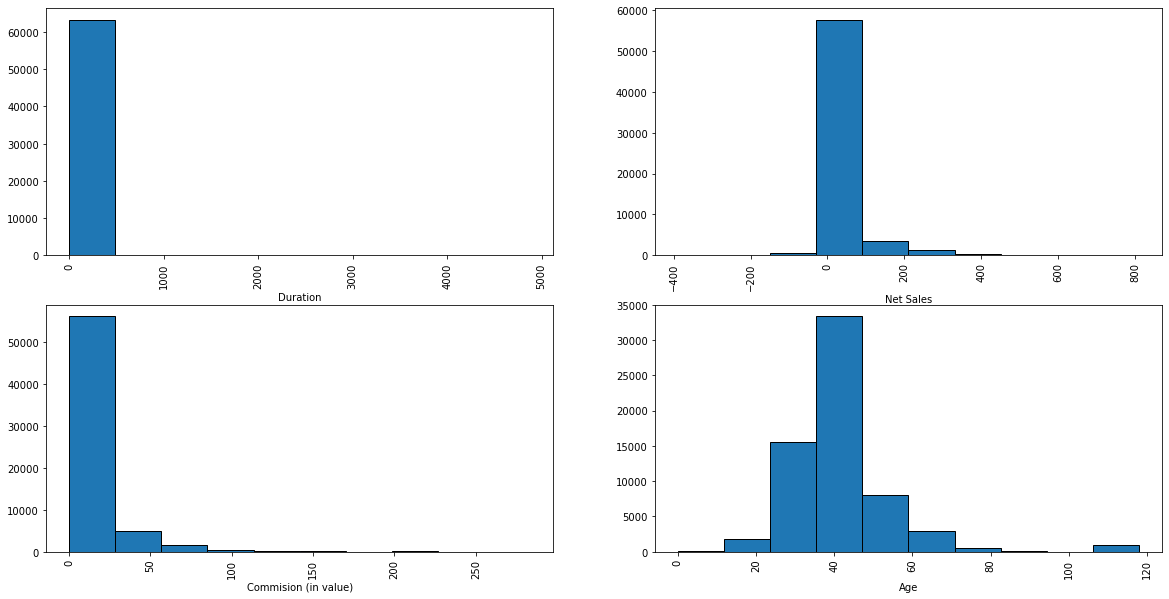

In [16]:
display_plots(univariate_hist,Numerical_columns)

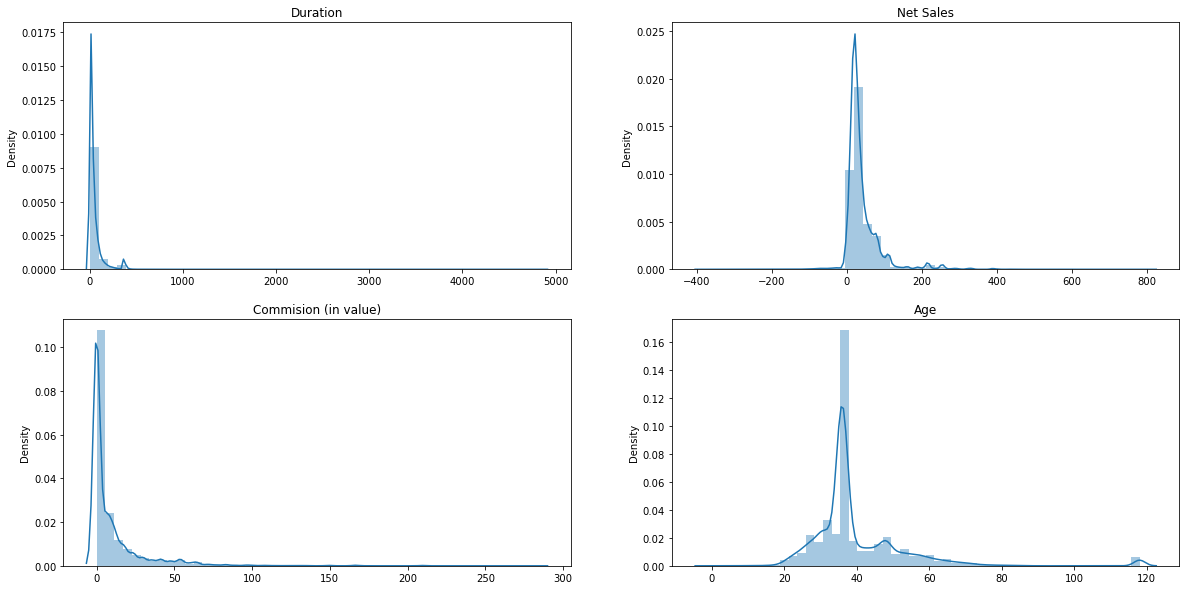

In [17]:
display_plots(univariate_dist,Numerical_columns)

# Bivariate Analysis

# If the target variable is categorical

# Step1-Analysis of continuous variables wrt categorical target

In [18]:
def bivariate_stripplot(columns,target):
    fig, axes = plt.subplots(2,2, figsize=(20,10)) # Divide the plot into 2 rows, 2 columns
    # Draw the plot in first row second column
    sns.stripplot(ax=axes[0,0],x=target , y = columns[0], data = customer_data)
    axes[0,0].set_title(columns[0])
    if len(columns)>1:
        sns.stripplot( ax=axes[0,1],x=target , y = columns[1], data = customer_data)
        axes[0,1].set_title(columns[1])
    if len(columns)>2:
        sns.stripplot( ax=axes[1,0],x=target , y = columns[2], data = customer_data)
        axes[1,0].set_title(columns[2])
    if len(columns)>3:
        sns.stripplot( ax=axes[1,1],x=target , y = columns[3], data = customer_data)
        axes[1,1].set_title(columns[3])

In [19]:
def display_plots_bivariate(func,cols,target):
    temp=0
    length=len(cols)
    if (length%4 == 0):
        condition=length+1
    else:
        condition=(length+(4-(length%4)))+1
    for i in range(4,condition,4):
        if i<length:
            func(cols[temp:i],target)
        else:
            func(cols[temp:length],target)
        temp=i

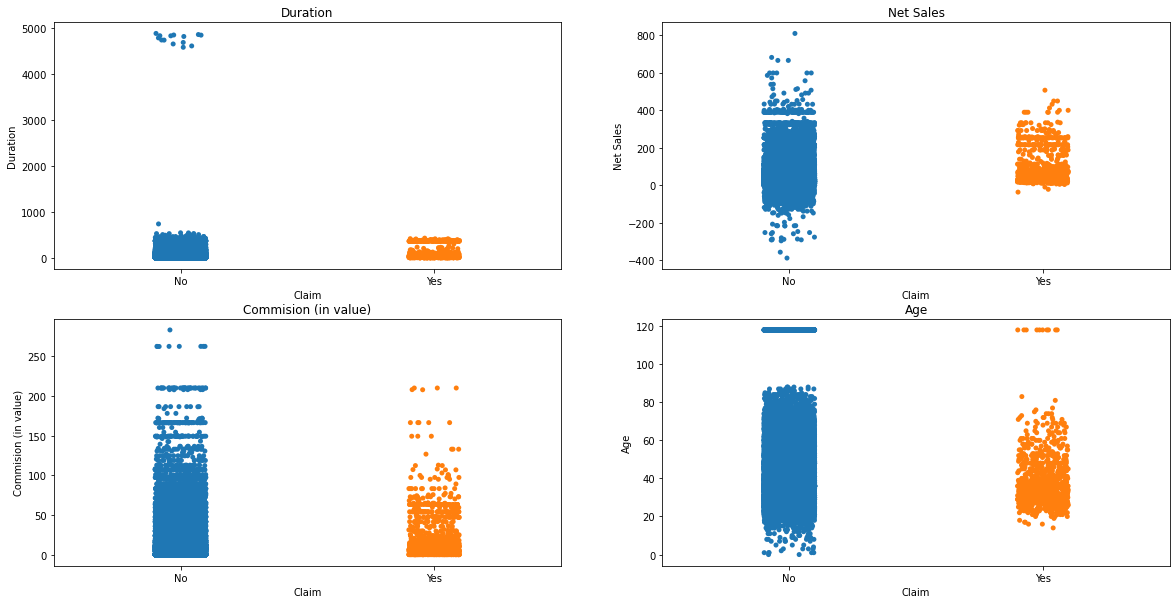

In [20]:
display_plots_bivariate(bivariate_stripplot,Numerical_columns,'Claim')

# Step2-Analysis of discretised continuous variables wrt categorical target

Now lets do the discretisation of continuous variables and then do the visualisation

In [21]:
def disc_EqualWidth(customer_data,variable):
    # now let's capture the lower and upper boundaries
    min_value = int(np.floor(customer_data[variable].min()))
    max_value = int(np.ceil(customer_data[variable].max()))
    range_value = max_value - min_value
    # let's round the bin width
    inter_value = int(np.round(range_value/10))
    intervals = [i for i in range(min_value, max_value+inter_value, inter_value)]
    labels = ['Bin_'+str(i) for i in range(1,len(intervals))]
    # create one column with labels
    customer_data[variable+'_disc_label'] = pd.cut(x = customer_data[variable], bins=intervals, labels=labels, include_lowest=True)
    # and one with bin boundaries
    customer_data[variable+'_disc'] = pd.cut(x = customer_data[variable], bins=intervals, include_lowest=True)
    

In [22]:
#Use any of the above 2 methods in the for loop of all numerical columns
for cols in Numerical_columns:
    disc_EqualWidth(customer_data,cols)

In [23]:
customer_data.head()

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Age,Claim_numeric,Duration_disc_label,Duration_disc,Net Sales_disc_label,Net Sales_disc,Commision (in value)_disc_label,Commision (in value)_disc,Age_disc_label,Age_disc
0,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,81,0,Bin_1,"(-2.001, 486.0]",Bin_3,"(-149.0, -29.0]",Bin_1,"(-0.001, 28.0]",Bin_7,"(72.0, 84.0]"
1,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,71,0,Bin_1,"(-2.001, 486.0]",Bin_3,"(-149.0, -29.0]",Bin_1,"(-0.001, 28.0]",Bin_6,"(60.0, 72.0]"
2,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,65,AUSTRALIA,-49.5,29.70,32,0,Bin_1,"(-2.001, 486.0]",Bin_3,"(-149.0, -29.0]",Bin_2,"(28.0, 56.0]",Bin_3,"(24.0, 36.0]"
3,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,60,AUSTRALIA,-39.6,23.76,32,0,Bin_1,"(-2.001, 486.0]",Bin_3,"(-149.0, -29.0]",Bin_1,"(-0.001, 28.0]",Bin_3,"(24.0, 36.0]"
4,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,79,ITALY,-19.8,11.88,41,0,Bin_1,"(-2.001, 486.0]",Bin_4,"(-29.0, 91.0]",Bin_1,"(-0.001, 28.0]",Bin_4,"(36.0, 48.0]"


In [24]:
#Creating a list of discretised numerical columns
Numerical_columns_disc=Numerical_columns+'_disc_label'

In [25]:
def bivariate_count(columns,target):
    fig, axes = plt.subplots(2,2, figsize=(20,15)) # Divide the plot into 2 rows, 2 columns
    # Draw the plot in first row second column
    axes[0,0].tick_params('x', labelrotation=90)
    sns.countplot(ax=axes[0,0],x=columns[0], hue=target, data = customer_data)
    if len(columns)>1:
        axes[0,1].tick_params('x', labelrotation=90)
        sns.countplot( ax=axes[0,1],x = columns[1],hue=target, data = customer_data)
    if len(columns)>2:
        axes[1,0].tick_params('x', labelrotation=90)
        sns.countplot( ax=axes[1,0],x = columns[2],hue=target, data = customer_data)
    if len(columns)>3:
        axes[1,1].tick_params('x', labelrotation=90)
        sns.countplot( ax=axes[1,1],x = columns[3],hue=target, data = customer_data)
    
   

In [26]:
def calc_perc(colname,target):
    df1=pd.DataFrame(customer_data.groupby([colname])[target])
    df1['perc']=0.0
    df1['target_total']=0
    df1['target_yes']=0
    df1['target_no']=0
    for i in range(0,len(df1)):
        df2=df1[1][i]
        total=len(df2)
        if(total==0):
            total=1
        df2=df2[df2=='Yes']
        count_yes=len(df2)
        df1['target_total'][i]=total
        df1['target_yes'][i]=count_yes
        df1['target_no'][i]=total-count_yes
        df1['perc'][i]=(count_yes/total)*100
    df1.rename(columns={0:colname},inplace=True)
    df1=df1.iloc[:,[0,2,3,4,5]]
    df1=df1.sort_values(by='perc',ascending=False)
    return df1

In [27]:
for cols in Numerical_columns_disc:
    df1=calc_perc(cols,'Claim')
    print(df1)

   Duration_disc_label      perc  target_total  target_yes  target_no
0                Bin_1  1.464524         63297         927      62370
1                Bin_2  0.000000            15           0         15
2                Bin_3  0.000000             1           0          1
3                Bin_4  0.000000             1           0          1
4                Bin_5  0.000000             1           0          1
5                Bin_6  0.000000             1           0          1
6                Bin_7  0.000000             1           0          1
7                Bin_8  0.000000             1           0          1
8                Bin_9  0.000000             1           0          1
9               Bin_10  0.000000            13           0         13
10              Bin_11  0.000000             1           0          1
  Net Sales_disc_label       perc  target_total  target_yes  target_no
6                Bin_7  11.475410           183          21        162
5                B

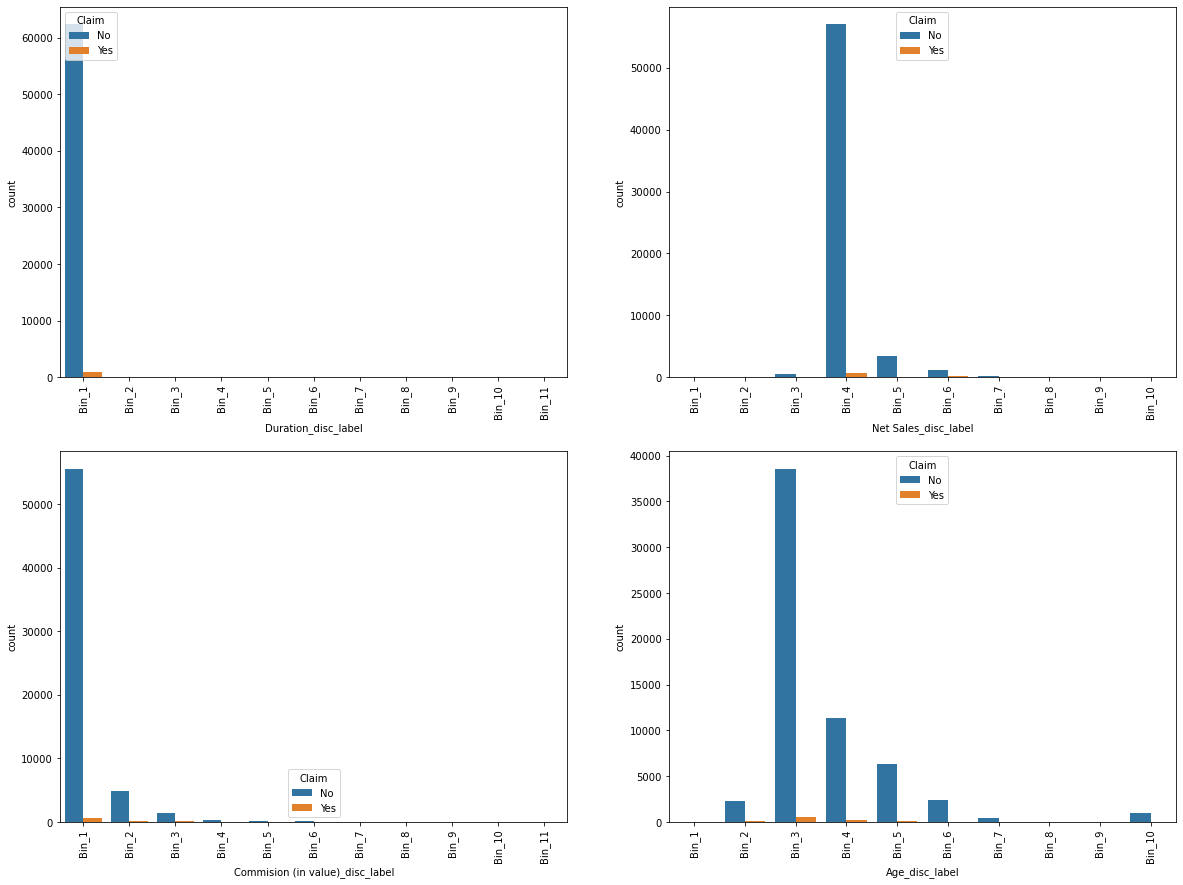

In [28]:
display_plots_bivariate(bivariate_count,Numerical_columns_disc,'Claim')

In [29]:
customer_data.corr()

,Duration,Net Sales,Commision (in value),Age,Claim_numeric
Duration,1.000000,0.429235,0.344772,0.002468,0.073607
Net Sales,0.429235,1.000000,0.651315,0.037756,0.133931
Commision (in value),0.344772,0.651315,1.000000,0.118348,0.098696
Age,0.002468,0.037756,0.118348,1.000000,-0.011614
Claim_numeric,0.073607,0.133931,0.098696,-0.011614,1.000000


# Visualization of Categorical Variables

Doing outlier imputation of Destination column as it has large number of categories.

In [30]:
def rare_new_imputation(customer_data,variable):
    temp = customer_data.groupby([variable])[variable].count()/np.float(len(customer_data))
    rare_cat = [x for x in temp.loc[temp<0.05].index.values]
    customer_data[variable+'_rare_imp'] = np.where(customer_data[variable].isin(rare_cat), 'Others', customer_data[variable])
    
      

In [31]:
rare_new_imputation(customer_data,'Destination')

In [32]:
customer_data.Destination_rare_imp.value_counts()

Others       26305
SINGAPORE    13255
MALAYSIA      5930
THAILAND      5894
CHINA         4796
AUSTRALIA     3694
INDONESIA     3452
Name: Destination_rare_imp, dtype: int64

In [33]:
Categorical_columns=customer_data.select_dtypes(include='object').columns
Categorical_columns

Index(['Agency', 'Agency Type', 'Distribution Channel', 'Product Name',
       'Claim', 'Destination', 'Destination_rare_imp'],
      dtype='object')

In [34]:
Categorical_columns=Categorical_columns.drop('Claim')

In [35]:
Categorical_columns=Categorical_columns.drop('Destination')

# Univariate Analysis

In [36]:
def univariate_count(columns):
    fig, axes = plt.subplots(2,2, figsize=(20,15)) # Divide the plot into 2 rows, 2 columns
    # Draw the plot in first row second column
    axes[0,0].tick_params('x', labelrotation=90)
    sns.countplot(ax=axes[0,0],x=columns[0],data = customer_data)
    if len(columns)>1:
        axes[0,1].tick_params('x', labelrotation=90)
        sns.countplot( ax=axes[0,1],x = columns[1], data = customer_data)
    if len(columns)>2:
        axes[1,0].tick_params('x', labelrotation=90)
        sns.countplot( ax=axes[1,0],x = columns[2], data = customer_data)
    if len(columns)>3:
        axes[1,1].tick_params('x', labelrotation=90)
        sns.countplot( ax=axes[1,1],x = columns[3], data = customer_data)
    
   

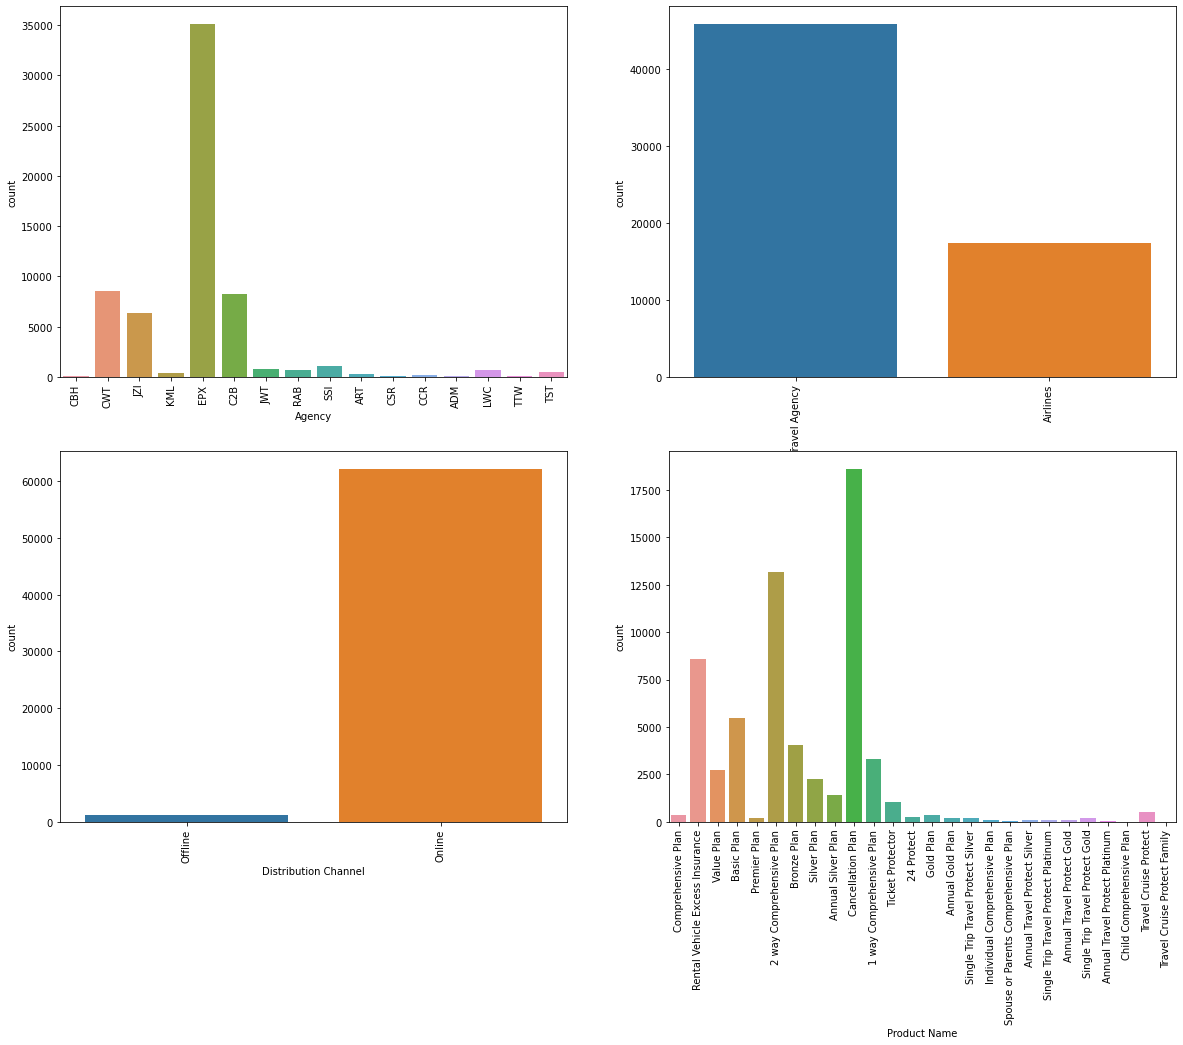

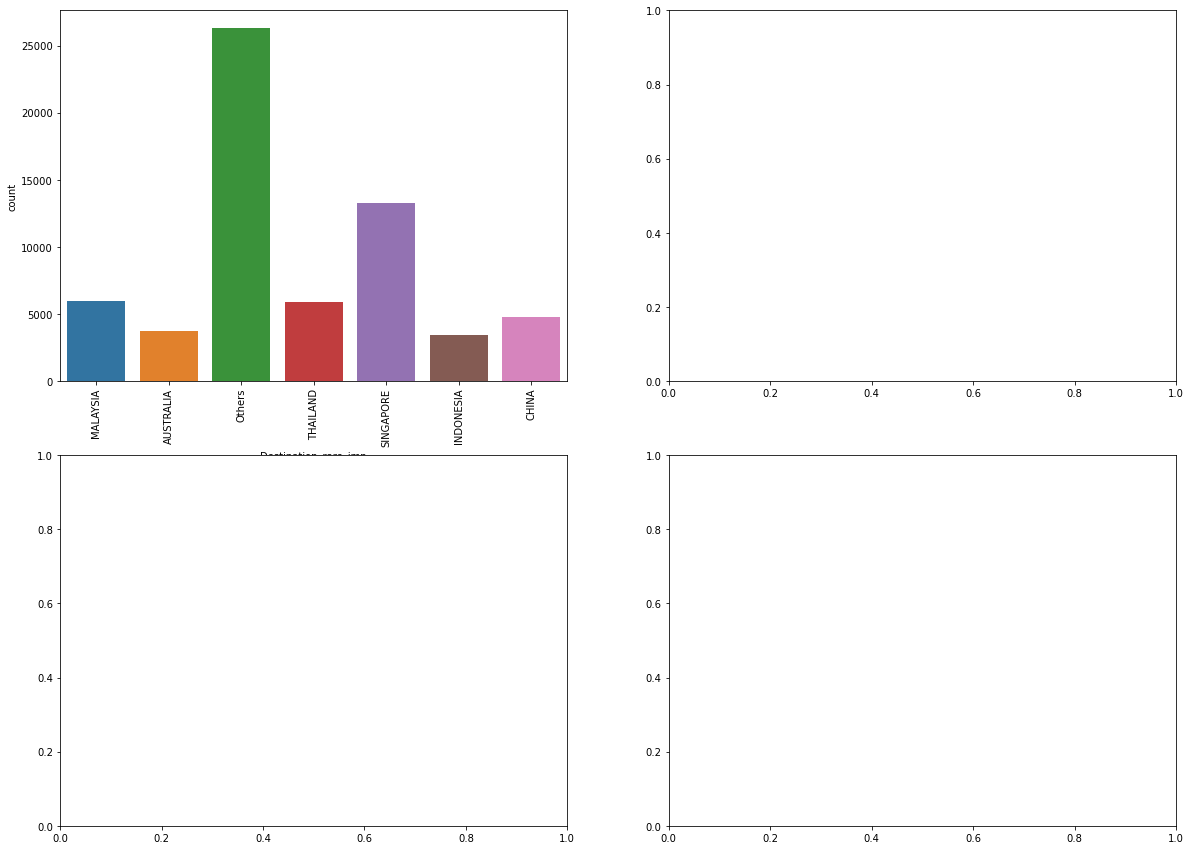

In [37]:
display_plots(univariate_count,Categorical_columns)

In [ ]:
customer_data.Destination.value_counts()

# Bivariate Analysis

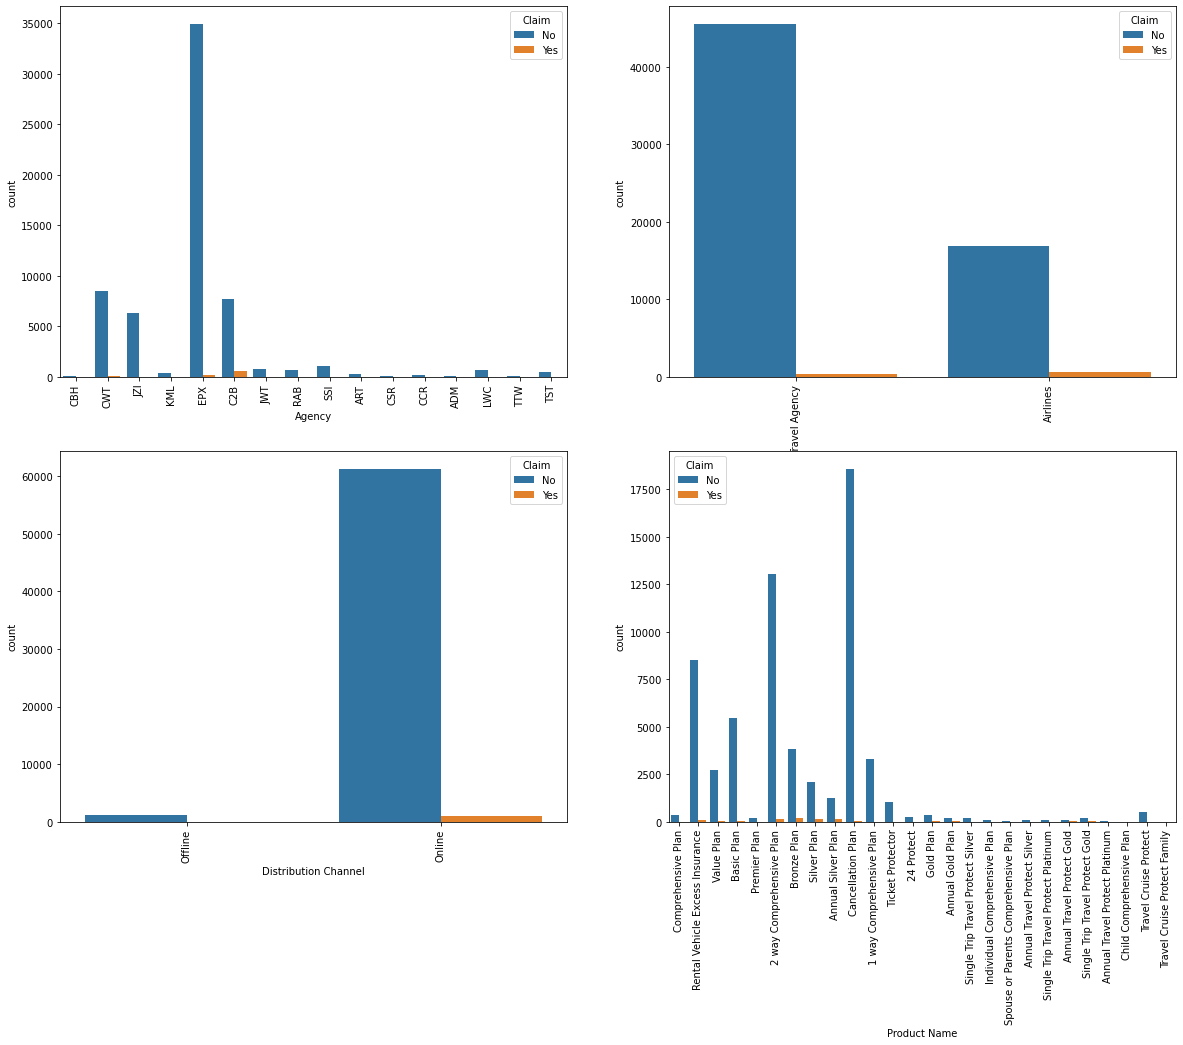

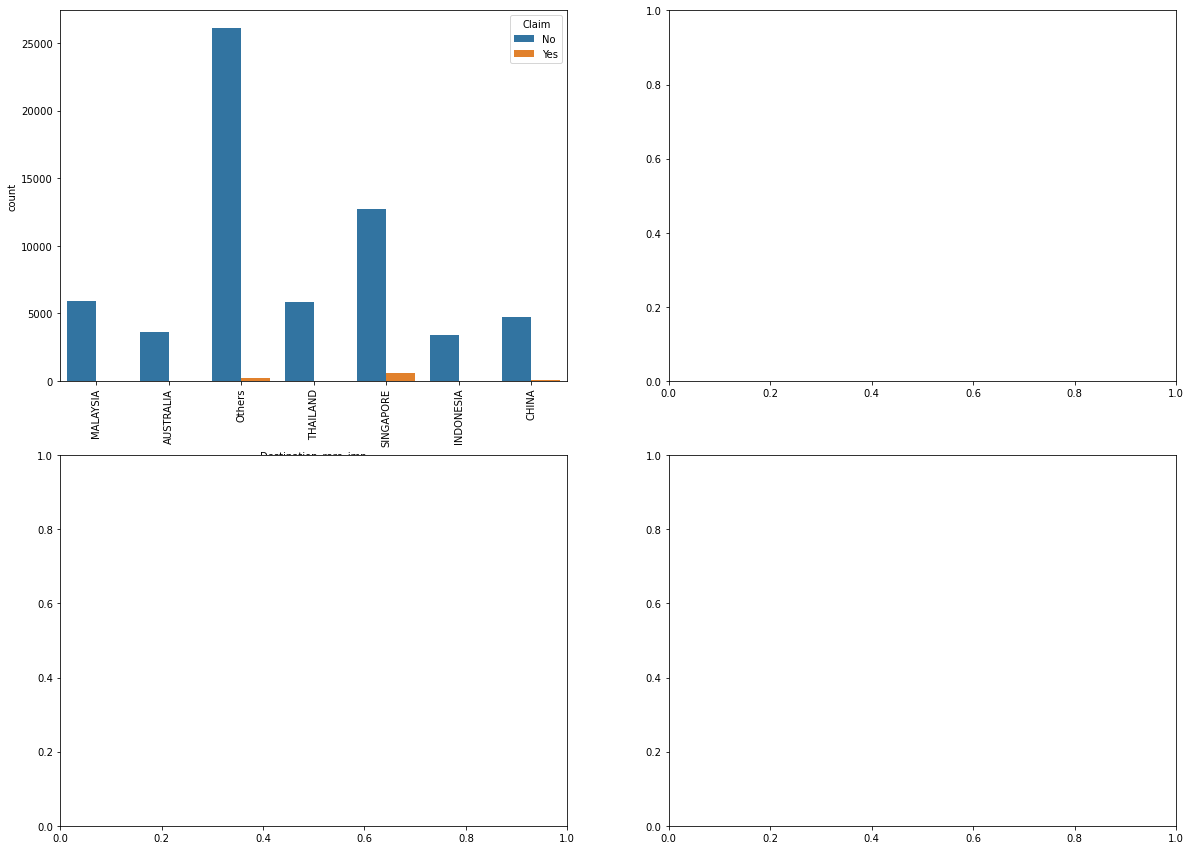

In [38]:
display_plots_bivariate(bivariate_count,Categorical_columns,'Claim')

In [39]:
for cols in Categorical_columns:
    df1=calc_perc(cols,'Claim')
    print(df1)

   Agency      perc  target_total  target_yes  target_no
2     C2B  6.616669          8267         547       7720
11    LWC  5.224964           689          36        653
15    TTW  4.081633            98           4         94
10    KML  2.040816           392           8        384
4     CCR  1.546392           194           3        191
5     CSR  1.162791            86           1         85
6     CWT  1.002331          8580          86       8494
3     CBH  0.990099           101           1        100
13    SSI  0.662879          1056           7       1049
7     EPX  0.555255         35119         195      34924
8     JWT  0.534045           749           4        745
9     JZI  0.489809          6329          31       6298
14    TST  0.378788           528           2        526
1     ART  0.302115           331           1        330
12    RAB  0.137931           725           1        724
0     ADM  0.000000            82           0         82
     Agency Type      perc  tar